In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import reciprocal, uniform

%matplotlib inline

### Soft Margin Classification

In [4]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.float64) # Iris virginica

In [5]:
svm_clf = Pipeline([
    ('sclaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [6]:
svm_clf.fit(X, y)

Pipeline(steps=[('sclaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

### Nonlinear SVC Classification

In [9]:
X, y = datasets.make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [10]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### Polynomial Kernel

In [12]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', C=5, degree=3, coef0=1))
])

In [13]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### Similarity Features

$$ \phi_{\gamma}(\mathbf{x}, l) = \exp(-\gamma\left \| \mathbf{x} - l \right \|^{2}) $$

### Gaussian RBF Kernel

In [14]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', C=0.001, gamma=5))
])

In [15]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### SVM Regression

In [17]:
svm_reg = Pipeline([
    ('sclaler', StandardScaler()),
    ('linear_svr', LinearSVR(epsilon=1.5))
])

In [18]:
svm_reg.fit(X, y)

Pipeline(steps=[('sclaler', StandardScaler()),
                ('linear_svr', LinearSVR(epsilon=1.5))])

In [20]:
svm_poly_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_poly_reg', SVR(kernel='poly', C=100, degree=2, epsilon=0.1))
])

In [21]:
svm_poly_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

### Decision Function and Predictions

$$ \widehat{y} = \left\{\begin{matrix}
0\ \mathrm{if}\ \mathbf{w}^{\top}\mathbf{x} + b <  0,
\\ 1\ \mathrm{if}\ \mathbf{w}^{\top}\mathbf{x} + b \geq 0
\end{matrix}\right. $$

$$
\underset{w, b, \zeta}{\mathrm{minimize}}\; \frac{1}{2} \mathbf{w}^{\top}\mathbf{x} + C\sum_{i = 1}^{m}\zeta^{(i)}
$$

$$
\mathrm{subject\ to}\; t^{(i)}(\mathbf{w}^{\top}\mathbf{x}^{(i)} + b) \geq 1 - \zeta^{(i)}\; \mathrm{and}\; \zeta^{(i)} \geq 0\; \mathrm{for}\ i = 1,2...,m 
$$

### Quadratic Programming

$$
\underset{\mathbf{p}}{\mathrm{Minimize}}\; \frac{1}{2} \mathbf{p}^{\top}\mathbf{Hp} + \mathbf{f}^{\top}\mathbf{p}
$$

$$
\mathrm{subject\ to}\; \mathbf{Ap} \leq \mathbf{b}
$$
$$ \mathrm{where} \left\{\begin{matrix}
\mathbf{p}\; \mathrm{is\ an}\ n_{p}\mathrm{-dimensional\ vector\ (}n_{p} = \mathrm{number\ of\ parameters),}
\\ \mathbf{H}\; \mathrm{is\ an}\ n_{p}\times n_{p}\ \mathrm{matrix,}
\\ \mathbf{f}\; \mathrm{is\ an}\ n_{p}\mathrm{-dimensional\ vector,}
\\ \mathbf{A}\; \mathrm{is\ an}\ n_{c}\times n_{p}\ \mathrm{matrix\ (}n_{c} = \mathrm{number\ of\ constraints),}
\\ \mathbf{A}\; \mathrm{is\ an}\ n_{c}\times n_{p}\ \mathrm{matrix\ (}n_{c} = \mathrm{number\ of\ constraints),}
\\ \mathbf{b}\; \mathrm{is\ an}\ n_{c}\mathrm{-dimensional\ vector.}
\end{matrix}\right. $$

$$
\underset{\mathbf{\alpha}}{\mathrm{minimize}}\frac{1}{2}\sum_{i = 1}^{m}\sum_{j = 1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}\mathbf{x}^{(i)\top}\mathbf{x}^{(j)} - \sum_{i = 1}^{m}\alpha^{(i)}
$$
$$
\mathrm{subject\ to}\ \alpha^{(i)} \geq 0\; \mathrm{for}\ i = 1,2...,m 
$$
$$
\widehat{\mathbf{w}} = \sum_{i = 1}^{m}\widehat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)}
$$
$$
\widehat{b} = \underset{\alpha^{(i)} > 0}{\sum_{i = 1}^{m}}(t^{(i)} - \widehat{\mathbf{w}}^{\top}\mathbf{x}^{(i)})
$$

### Kernelized SVMs

$$\phi(\mathbf{x}) = \phi\left ( \begin{pmatrix}
x_{1}
\\ x_{2}
\end{pmatrix} \right ) = \begin{pmatrix}
x_{1}^{2}
\\ \sqrt{2}x_{1}x_{2}
\\ x_{2}^{2}
\end{pmatrix}$$

$$\phi(\mathbf{a})^{\top}\phi(\mathbf{b}) = \phi\left ( \begin{pmatrix}
x_{1}
\\ x_{2}
\end{pmatrix} \right ) = \left ( \begin{pmatrix}
x_{1}^{2}
\\ \sqrt{2}x_{1}x_{2}
\\ x_{2}^{2}
\end{pmatrix} \right )$$

$$
\phi(\mathbf{a})^{\top}\phi(\mathbf{b}) = \begin{pmatrix}
a_{1}^{2}
\\ \sqrt{2}a_{1}a_{2}
\\ a_{2}^{2}
\end{pmatrix}^{\top} \begin{pmatrix}
b_{1}^{2}
\\ \sqrt{2}b_{1}b_{2}
\\ b_{2}^{2}
\end{pmatrix} = a_{1}^{2}a_{2}^{2} + 2a_{1}a_{2}b_{1}b_{2} + b_{1}^{2}b_{2}^{2}
= (a_{1}b_{1} + a_{1}b_{1})^{2} = \left (\begin{pmatrix}
a_{1}
\\ a_{2}
\end{pmatrix}^{\top}\begin{pmatrix}
b_{1}
\\ b_{2}
\end{pmatrix}  \right )^{2} = \left ( \mathbf{a}^{\top}\mathbf{b} \right )^{2}
$$

$$ \mathrm{Linear:}\; K(\mathbf{a},\mathbf{b}) = \mathbf{a}^{\top}\mathbf{b} $$
$$ \mathrm{Polynomial:}\; K(\mathbf{a},\mathbf{b}) = (\gamma \mathbf{a}^{\top}\mathbf{b} + r)^{d} $$
$$ \mathrm{Gaussian\ RBF:}\; K(\mathbf{a},\mathbf{b}) = \exp\ \left (-\gamma \left \| \mathbf{a} - \mathbf{b} \right \|^{2} \right )$$
$$ \mathrm{Sigmoid:}\; K(\mathbf{a},\mathbf{b}) = \tanh\ (\gamma \mathbf{a}^{\top}\mathbf{b} + r) $$

$$h_{\widehat{\mathbf{w}}, \widehat{b}}\left ( \phi \left ( \mathbf{x}^{(n)} \right ) \right ) = \widehat{\mathbf{w}}^{\top}\phi \left ( \mathbf{x}^{(n)} \right ) + \widehat{b} = \left ( \sum_{i = 1}^{m}\widehat{\alpha}^{(i)}t^{(i)}\phi\left ( \mathbf{x}^{(i)} \right ) \right )^{\top}\phi\left ( \mathbf{x}^{(n)} \right ) + \widehat{b}$$

$$
 = \sum_{i = 1}^{m}\widehat{\alpha}^{(i)}t^{(i)}\left (\phi\left ( \mathbf{x}^{(i)} \right )  \right )^{\top}\left (\phi\left ( \mathbf{x}^{(n)} \right )  \right ) + \widehat{b}
$$
 
$$
 = \underset{\alpha^{(i)} > 0}{\sum_{i = 1}^{m}}\alpha^{(i)}t^{(i)}K\left ( \mathbf{x}^{(i)}, \mathbf{x}^{(n)} \right ) + \widehat{b}
$$

### Exercises
#### 8.

In [33]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [37]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.319] [[1.12087283 1.02679408]]


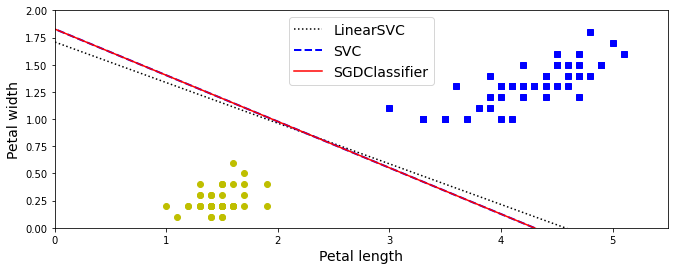

In [38]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

#### 9.

In [39]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [42]:
rnd_idx = np.random.permutation(60000)
X_train = X_train.loc[rnd_idx]
y_train = y_train.iloc[rnd_idx]

In [43]:
lin_clf = LinearSVC()
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [44]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8871666666666667

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [ ]:
lin_clf = LinearSVC()
lin_clf.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

In [ ]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

#### 10.

In [2]:
housing = datasets.fetch_california_housing()

In [4]:
X = housing['data']
y = housing['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
lin_svr = LinearSVR()
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [15]:
y_pred = lin_svr.predict(X_train_scaled)

In [16]:
mse = mean_squared_error(y_train, y_pred)
mse

1.1735581505623738

In [17]:
np.sqrt(mse)

1.0833088897273824

In [18]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=3.822977504262024, gamma=0.03586513938492875; total time=  14.9s
[CV] END .....C=3.822977504262024, gamma=0.03586513938492875; total time=  15.2s
[CV] END .....C=3.822977504262024, gamma=0.03586513938492875; total time=  14.5s
[CV] END ....C=10.20997547257143, gamma=0.020343503008480333; total time=  14.1s
[CV] END ....C=10.20997547257143, gamma=0.020343503008480333; total time=  15.1s
[CV] END ....C=10.20997547257143, gamma=0.020343503008480333; total time=  15.2s
[CV] END ....C=1.0544536622502512, gamma=0.08317988008431426; total time=  15.1s
[CV] END ....C=1.0544536622502512, gamma=0.08317988008431426; total time=  15.3s
[CV] END ....C=1.0544536622502512, gamma=0.08317988008431426; total time=  12.5s
[CV] END .....C=1.981898753107452, gamma=0.04598336046804342; total time=  12.4s
[CV] END .....C=1.981898753107452, gamma=0.04598336046804342; total time=  12.4s
[CV] END .....C=1.981898753107452, gamma=0.04598

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11a231760>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11ad43f70>},
                   verbose=2)

In [24]:
best_estimator = rnd_search_cv.best_estimator_
best_estimator

SVR(C=7.667404200049266, gamma=0.04923638430563541)

In [26]:
y_pred = best_estimator.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5878066846911257

In [27]:
y_pred = best_estimator.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.6811785910857753